## Challenges with Supervised Learning 
- Requires large amounts of labeled data, which is expensive! 
- Often there is a LOT more unlabeled data than labeled! 

Humans, **recognized patterns** within observations **without explicit supervisory signals**. 

If we see the pattern/understand groups of animals are similar, that's fine! The most important thing is to understand those similarities. 

## Feature Clustering 
Just looking at the left side, you don't know what it's about, but you clearly see clustering! 

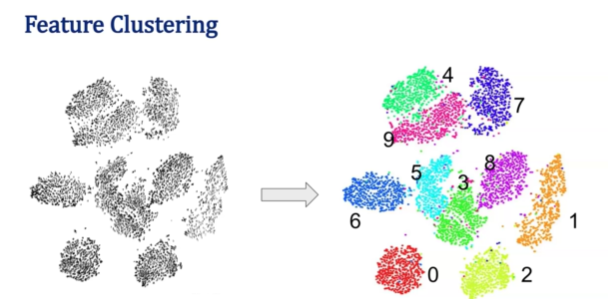



If you learn to group the stuff together, you need very few examples to be able to label all the data. 

This is all about embeddings again. These are visualizations in 2D. 

We want to learn embeddings such that they are separable based on classes, but can we train this without access to ground truth labels? 





## Autoencoders 
Finds efficient representations of input data that could be used to reconstruct original input using two components. 

### Encoder 
- Convert inputs to an internal representation 
- Dimensionality Reduction 

Well we cannot classify ourselves. 

Rather than trying to classify the data, keep the encoder as it was. Instead of passing it to a classifier, pass it to a decoder. 

Use decoder to try to reconstruct the input in the output. 

### Decoder 
- Converts internal representation to the outputs. This is a **reconstruction**. 
- Generative Network 






## Goal of Encoder-Decoder: 

This is to minimize the difference between the input and output. 

The embedding dimension is **always much smaller** than input dimension. 

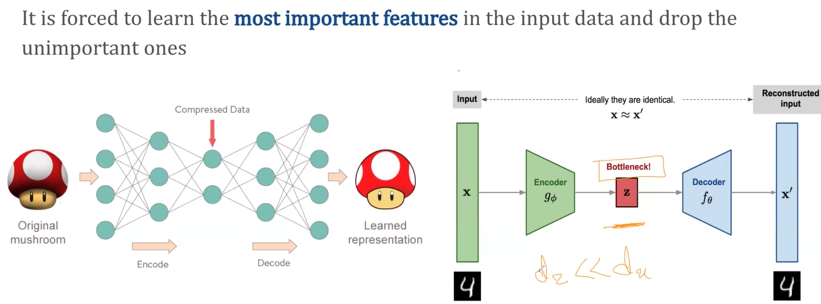
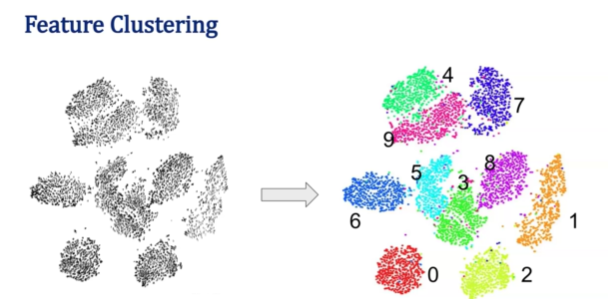

The encoder is pushed to learn the most important features (due to lower dimensionality). Decoder only sees the embedding, not the input! 

The **reconstruction loss** will update both the encoder and decoder. 

## Stacked Autoencoders 

Autoencoders typically have multiple hidden layers: Stakced (deep) autoencoders. 

Typically symmetrical with regards to the central coding layer, unless you really want one to be stronger than the other. 

## Visualizing Reconstructions 
One way to ensure the autoencoder is properly trained is to **compare the inputs and the outputs** 

That said, this does NOT rule out overfitting! 



## Denoising Autoencoders 

Noise can be added to the input to force the model to learn useful features. Autoencoder is trained to **recover the original, noise-free inputs**. 

This prevents it from trivially copying its inputs to its outputs. it HAS to find patterns in the data. It is actually understanding the content in the image and makes it generalizable. 

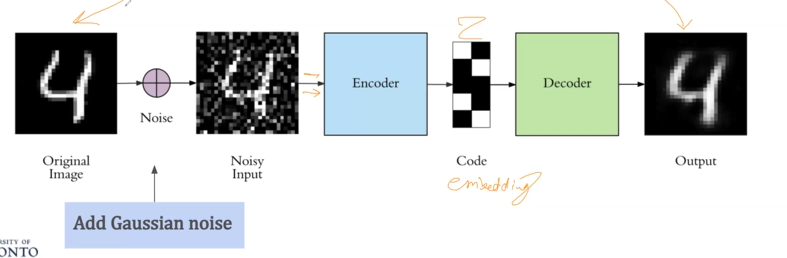

Keep in mind we do NOT pass in the noisy images into the loss function. We **always** use the original one. 

## Applications 
- Feature Extractions 
- Unsupervised Pre-training 
- Dimensionality Reduction 
- Anomaly Detection --> Autoencoders are BAD at reconstructing outliers 

Think about credit card fraud. It is tough to collect supervised data for fraudulent credit card transactions! Only a tiny percentage of them are fraudulent! This causes a large imbalance. 

- Generating new data

Because the autoencoder has not seen much fraudulent data, it should be **bad** at producing its reconstruction. You can check the magnitude of the loss function to look for anomalies! 



## Generating New Images 

We are drastically reducing the image dimensionality. There has to be *some kind of structure* in the codings. 

The network should be able to **save space by mapping similar images to similar embeddings**. 

Let's say we have two inputs. 

Pass both into the encoder, then separately take those embeddings, take an interpolation between them. 

Pass this new embedding into the decoder. Now this will "reconstruct" a new image! 

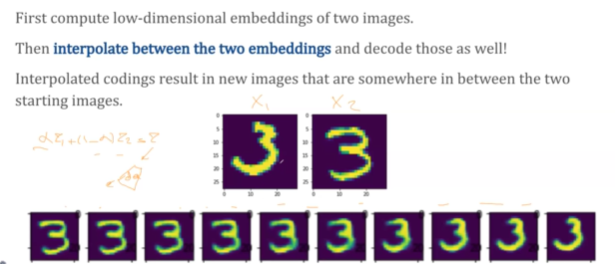

here, the alpha is varying amongst the images!

Now if you try to interpolate between two different digits, it might just output nonsense! 


## Plotting Interpolating Codings 

What if we randomly select a coding? The latent space in autoencoders can become **disjoint** and non-continuous. 

Autoencoder tries to minimize the reconstruction loss. The model needs to overcome the bottleneck. 

### Strategy 1: Remove noise as much as you can 
### Strategy 2: Group similar things together in embedding space; this is data compression. 

If you throw in something random, this will likely lie in the **empty spaces** in the embedding space. It will try to interpolate something between groups. 

## Variational Autoencoders (VAEs)

1. Probabilistic --> Outputs are partly determined by CHANCE, even after training 
2. Generative --> They can generate new instances that look like they were SAMPLED FROM THE TRAINING SET. 

They impose a distribution constraint on the latent space. 

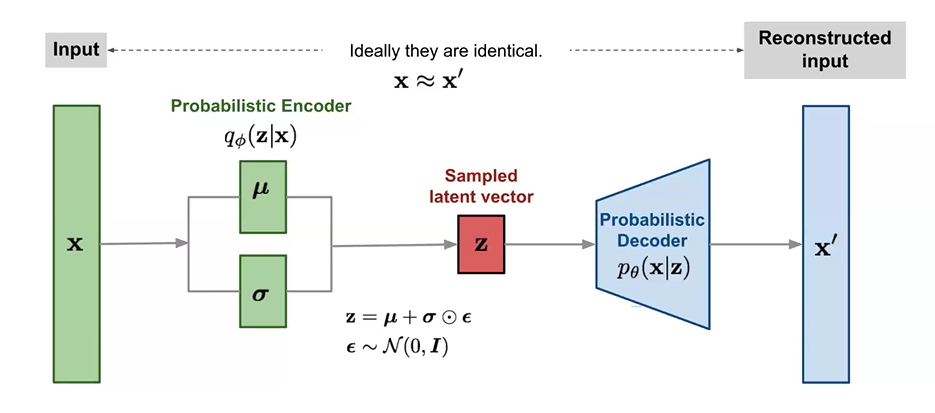

Encoder generates a normal distribution with mean $\mu$ and a standard deviation $\sigma$ instead of a fixed embedding. 

An embedding is sampled from the distribution and decoder decodes the sample to reconstruct the input. 

## VAE Procedures 

- Pass x to encoder 

Now rather than z, it gives you **two vectors**. We want to **sample** from these generative models. We want to sample infinite valid images. 

Rather than learning a fixed embedding, we will learn $\mu$ and $\sigma$ from a normal distribution.

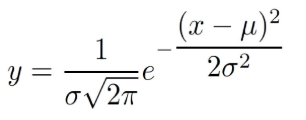

Once you have it, you can have probability of **any given point**. You are learning a distribution for **each dimension**. Hence why the outputs are the same dimension. 

## VAE Loss Function? 

Now here is the catch. If the encoder learns $\mu$ and $\sigma$, we need to still sample from the embedding. 

The issue is, the sampling operator is **not differentiable**. This will not allow gradients! 

To address this, people use **reparametrization**. 

Use another distribution to sample from this distribution! We are to make the sampling part **differentiable**. 

Generate a **random number**, $\epsilon$, you do the random sampling outside. 

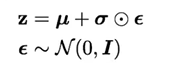


The distribution covers ALL THE SPACE for you! It expands through the space of the embedding for you, instead of single point embeddings. 

Note that epsilon is sampled from **Zero mean, Unit Variance**. We want to learn it to that to achieve a normal distribution. 

## KL Divergence 

Measures the difference between **two distributions P(X) and Q(X)**. 

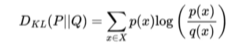

Tells you how dissimilar two distributions are. 

If we plug-in the encoder distribution and the prior 

Commonly, 

p(x) --> one-hot encoding 

q(x) --> Probability 

This just becomes like cross-entropy. 

## Plugging in 

We need to encourage the network to learn mu and sigma, such that they are close to 0 and 1. 

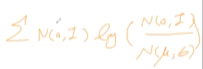

If we apply this to two multivariate Gaussians, we get: 

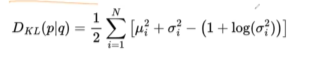

This measures how different the two probability distributions are. 

This can now be utilized as a **LOSS TERM**. We will have both a reconstruction and kl-divergence loss. 

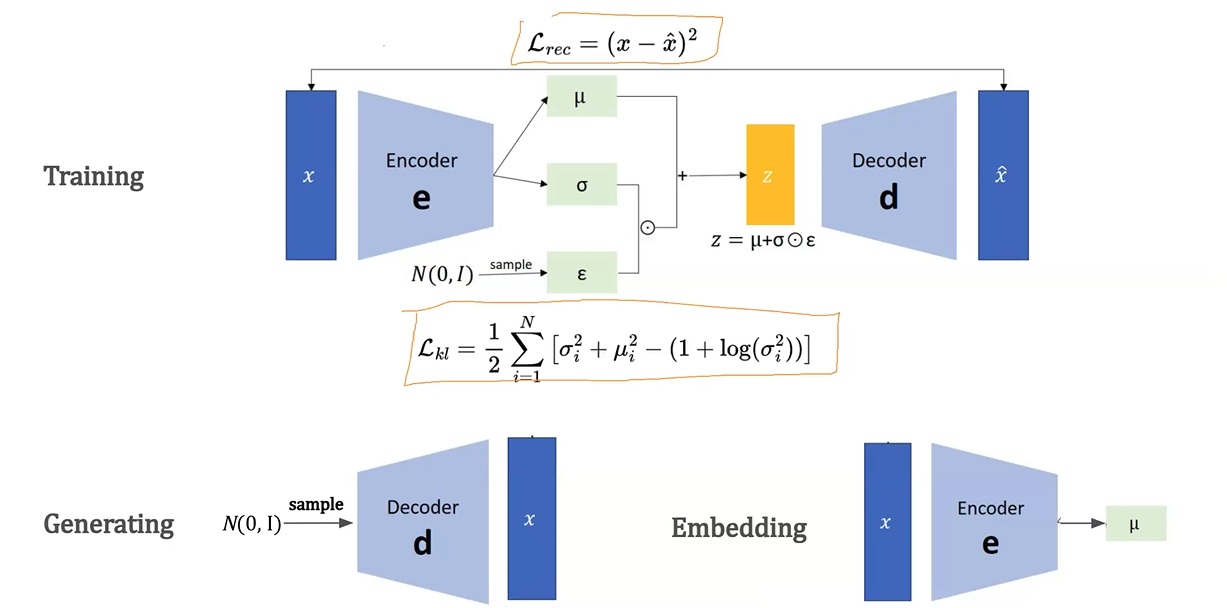

## What we can use VAEs for 

Keep generating images: 
- Any random number you pass to it, pass it to decoder, every time you will get a proper image. 

Encoder: 
- Create new embedding 

## Convolutional Autoencoder 

These take advantage of **spatial information**. 
- **Encoder:** Learns embedding using convolutional Layers 
- **Decoder:** Up-samples the learned visual embedding to match the **original size** of the image. 



## Transposed Convolution 
Opposite of convolution 

**Instead of mapping KxK pixels to 1, they can map from 1 pixel to KxK pixels.**

The kernels are learned just like normal convolutional kernels 

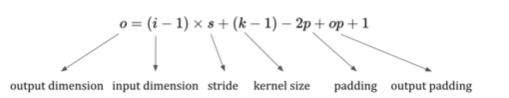
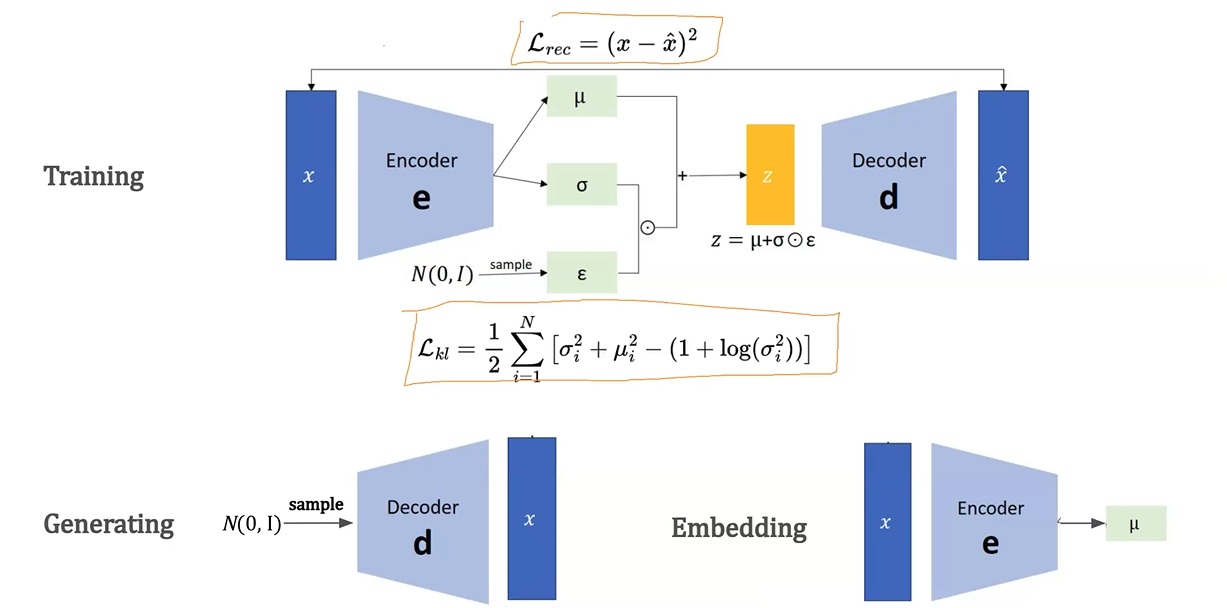

1. Take each pixel of your input image 
2. Multiple each value of your kernel with the input pixel to get a **weighted kernel**
3. Insert it in the output to create an image 
4. Where the outputs overlap, SUM THEM. 

 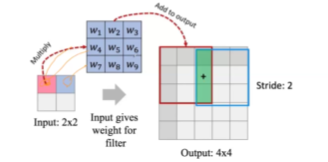

## Padding
Opposite of what happens with convolution layers 

You are dropping **one layer** of border for transpose convolution 

1. Compute the output as normal 
2. Remove rows and columns around the perimeter. 

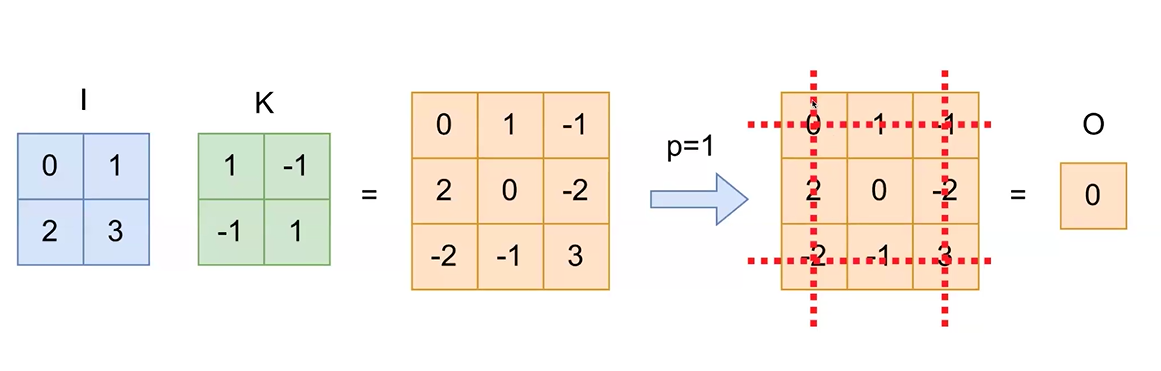


## Output Padding 

- When stride > 1, Conv2d maps multiple input shapes to the same otuput shape 

- For example, inputs of size 7x7 and 8x8 both return an output of 3x3 for a kernel size 3x3 with stride = 2. 

- When applying the tranpose convolution, it is **ambiguous** which output shape to return, 7x7 or 8x8 for stride=2 transpose convolution. 

- Output padding is provided to resolve this ambiguity by effectively increase the calculated output shape. It does NOT actually add zero-adding to output. 

## Strides 

Also opposite effect of convolution layers 

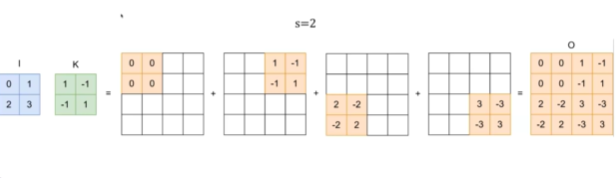

This increases the upsampling effect. 

## Pre-Training with Autoencoders 
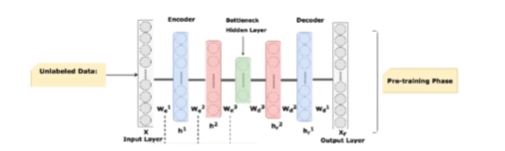

Now can we do transfer learning? 

Let's say you train the huge autoencoder. Can we do the same trick of finetuning? 

So right now, **remove the decoder**, and replace it with the classifier. This fine-tunes it! 

Train a huge enocder with internet images, then just fine tune the classifier. 


## Self-Supervised Learning 
Autoencoders are just one approach. 

What if we can cast unsupervised learning into supervised setting? 

### We define proxy supervised tasks. 
- The labels are generated automatically for free. 
- Solving the task requires the model to **understand** the content. 

The challenge is devising the tasks such that they **enforce** the model to learn robust representations. 

Although we have no access to ground truth labels, 

## RotNet 

Idea: Rotate images randomly by 0, 90, 180, 270 degrees and make the model to **predict the rotation angle**. If someone is **not aware** of the concepts of the objects depicted in the images, they **cannot recognize the rotation** that was applied to them. 

Pass the image x into encoder for embedding, pass into classifier, pass into class 0, 1, 2, 3. 

Every time you sample a random batch, randomly rotate the image by one of those degrees. Then, train the network to predict, with what degree is the image rotated? This gives us meaningful embeddings because, in order to understand the angle we need to understand what's in the image. 



## Constrastive Learning 
One issue with autoencoders is that, it is not a good idea to compare images in pixel space! 

Move them to embedding space and compare them there! The autoencoder is just learning 

- Contrast pair of positive/negative samples. 
- Compute the loss in embedding space 
- Compress relevant information 
- Requires lots of negative examples 

Train network by pushing embeddings of images that are relevant semantically **close to each other**. However, we don't know which images are relevant or irrelevant! 

## SimCLR: The Solution relying on Augmentation 

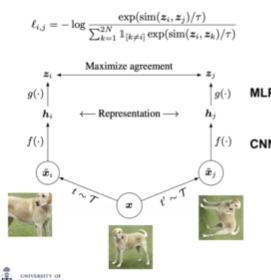

For each image, create two augmentations. We know they are coming from the **same image**, and push their embeddings close to each other. 

B (Batch): 3 images 

First thing we'll do, create 2 augmentations per image. 

We will then create a matrix and line them up as so. 

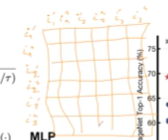

The shaded images are those whose embeddings we want to push close to each other. These are the **positive examples**

The rest are embeddings we want to push apart. These are **negative examples**. 

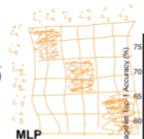

We need to define a similarity function. This can just be a dot product. 

We need to raise that dot product for similar images, lower it for those that aren't.  